## Import modules (part 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

%matplotlib inline

In [2]:
#importing the packages and modules for the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Set hyper parameters (part 2)

In [3]:
batch_size = 20
IMG_HEIGHT = 128
IMG_WIDTH = 128

## Read image data set (part 3)

In [4]:
PATH = "data"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
#data Understanding
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 20
total training dog images: 20
total validation cat images: 10
total validation dog images: 10
--
Total training images: 40
Total validation images: 20


### Data preprocessing

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 40 images belonging to 3 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 20 images belonging to 3 classes.


### Visualize training images

In [11]:
sample_training_images, _ = next(train_data_gen)


In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


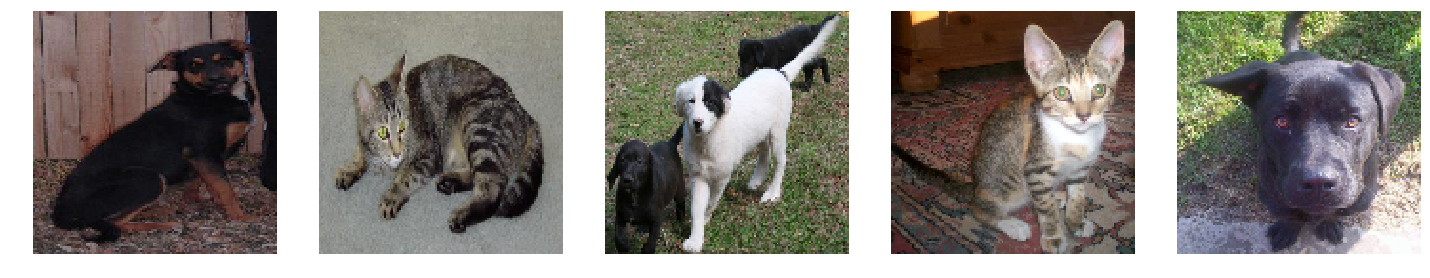

In [13]:
plotImages(sample_training_images[:5])

#### creating model

In [14]:
#model creation and set hyper parameters
model = Sequential([
    Conv2D(32, [5,5], padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.4),
    Conv2D(64, [5,5], padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.4),
    Flatten(),
    Dense(32, activation='softmax'),
    Dense(1)
])

In [15]:
# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

## Run TensorFlow model (part 4) 
1) Run model for 100 epochs

In [17]:
epochs = 100

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 1 steps
Epoch 1/100
2/2 [==============================] - 2s 1s/step - loss: 0.5563 - accuracy: 0.0000e+00 - val_loss: 0.3868 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 2s 856ms/step - loss: 0.3610 - accuracy: 0.0000e+00 - val_loss: 0.3472 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 2s 855ms/step - loss: 0.3458 - accuracy: 0.0000e+00 - val_loss: 0.3428 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 2s 889ms/step - loss: 0.3421 - accuracy: 0.0000e+00 - val_loss: 0.3393 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 2s 853ms/step - loss: 0.3383 - accuracy: 0.0000e+00 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 2s 856ms/step - loss: 0.3351 - accuracy: 0.0000e+00 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==

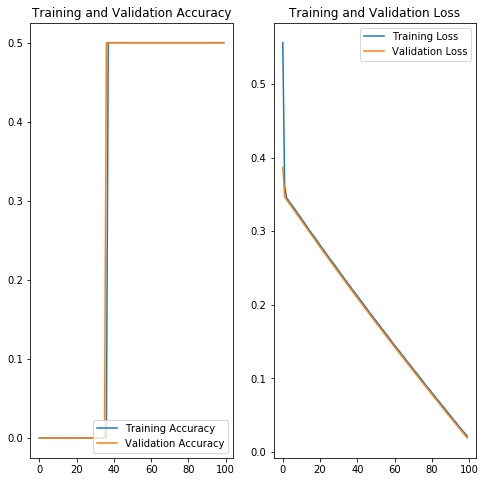

In [18]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


2) Run model for 200 epochs

In [19]:
epochs = 200
# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 1 steps
Epoch 1/200
2/2 [==============================] - 2s 839ms/step - loss: 0.0178 - accuracy: 0.5000 - val_loss: 0.0157 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 2s 892ms/step - loss: 0.0148 - accuracy: 0.5000 - val_loss: 0.0127 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 2s 808ms/step - loss: 0.0121 - accuracy: 0.5000 - val_loss: 0.0095 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 2s 852ms/step - loss: 0.0086 - accuracy: 0.5000 - val_loss: 0.0065 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 2s 890ms/step - loss: 0.0056 - accuracy: 0.5000 - val_loss: 0.0035 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 2s 854ms/step - loss: 0.0029 - accuracy: 0.5000 - val_loss: 3.8282e-04 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 2s 847ms/

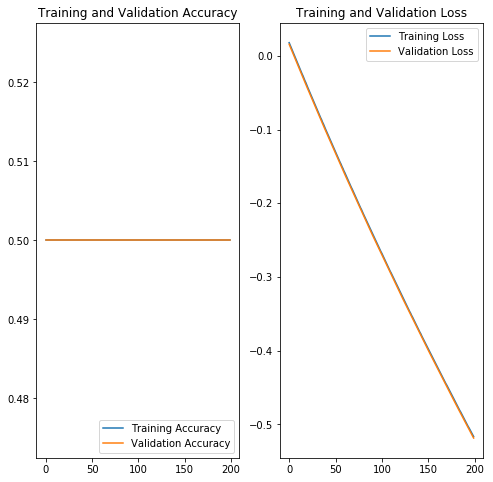

In [20]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3) Run model for 300 epochs

In [21]:
epochs = 300
# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 1 steps
Epoch 1/300
2/2 [==============================] - 2s 843ms/step - loss: -0.5191 - accuracy: 0.5000 - val_loss: -0.5211 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 2s 849ms/step - loss: -0.5218 - accuracy: 0.5000 - val_loss: -0.5234 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 2s 851ms/step - loss: -0.5241 - accuracy: 0.5000 - val_loss: -0.5257 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 2s 852ms/step - loss: -0.5265 - accuracy: 0.5000 - val_loss: -0.5281 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 2s 850ms/step - loss: -0.5285 - accuracy: 0.5000 - val_loss: -0.5305 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 2s 849ms/step - loss: -0.5312 - accuracy: 0.5000 - val_loss: -0.5328 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 2

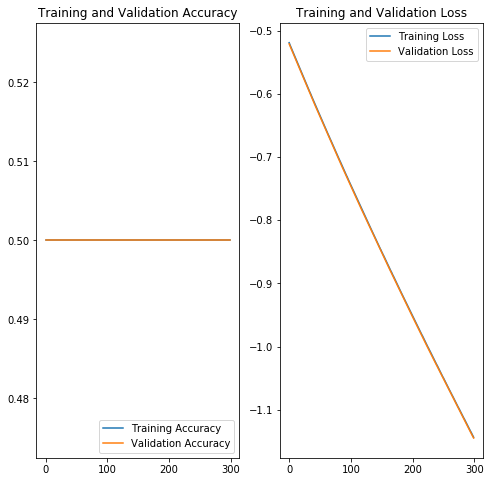

In [22]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
